# Conduction avec parametres variables

In [1]:
from trustutils import run

run.introduction("A. Bruneton")
run.description("Validation de l'implementation des milieux variables pour l'equation de conduction en VDF. On montre tout d'abord que l'equation de conduction standard de TRUST permet de faire varier le coefficient $\lambda$ aussi bien en temps qu'en espace, puis que, par contre, les nouveaux developpements de Conduction_Milieu_Variable permettent aussi de faire varier $\rho$ et $C_p$ en espace")
run.TRUST_parameters()

## Introduction 
 Validation made by : A. Bruneton



 Report generated 28/01/2022

### Description 
Validation de l'implementation des milieux variables pour l'equation de conduction en VDF. On montre tout d'abord que l'equation de conduction standard de TRUST permet de faire varier le coefficient $\lambda$ aussi bien en temps qu'en espace, puis que, par contre, les nouveaux developpements de Conduction_Milieu_Variable permettent aussi de faire varier $ho$ et $C_p$ en espace

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/Verification_codage/conduc_mil_var/build)

In [2]:
from trustutils import run 
c1 = run.addCase(".","conduc.data")
c2 = run.addCase(".","conduc_bar.data")
c3 = run.addCase(".","conduc_bar_ef_ana.data")
c4 = run.addCase(".","conduc_bar_var.data")
c5 = run.addCase(".","conduc_doublebar.data")
c6 = run.addCase(".","conduc_doublebar_rhoCp_var.data")
c7 = run.addCase(".","conduc_doublebar_rhoCp_var_ef.data")
c8 = run.addCase(".","conduc_doublebar_rhoCp_var_vef.data")
c9 = run.addCase(".","conduc_doublebar_var.data")
#c10= run.addCase(".","conduc_doublebar_var_vef.data")
#c11= run.addCase(".","conduc_doublebar_vef.data")
c12= run.addCase(".","conduc_var.data")
run.printCases()
run.runCases()

### Test cases 
* ./conduc.data : 
* ./conduc_bar.data : 
* ./conduc_bar_ef_ana.data : 
* ./conduc_bar_var.data : 
* ./conduc_doublebar.data : 
* ./conduc_doublebar_rhoCp_var.data : 
* ./conduc_doublebar_rhoCp_var_ef.data : 
* ./conduc_doublebar_rhoCp_var_vef.data : 
* ./conduc_doublebar_var.data : 
* ./conduc_var.data : 


Running ...
  => A total of 10 cases were (successfully) run in 6.6s.


## Quelques rappels theoriques

L'equation de la chaleur s'écrit

$$ \rho C_p \frac{\partial T}{\partial t} - \nabla \cdot (\lambda \nabla T)=S $$

avec $\lambda$ la conductivite thermique, $\rho$ la masse volumique, $C_p$ la capacite calorifique, $T$ la temperature et $S$ un terme source volumique. 

Dans l'equation de conduction standard de TRUST, on suppose que $\rho$ et $C_p$ sont uniformes (constants en espace), et  on calcule le terme de diffusivite de l’operateur de diffusion $D=\lambda/(\rho C_p)$ ce qui permetde reecrire l’equation de diffusion sous la forme:

$$ \frac{\partial T}{\partial t} - \nabla \cdot (D \nabla T)=S\frac{S}{\rho C_p} $$

Cela permet de faire appel directement a l’operateur de diffusion de TRUST. L’uniformite de $\rho$ et $C_p$ est maintenant vérifiée dans la methode Conduction::associer_solide().  et ainsi la nouvelle classe Conduction_Milieu_Variable autorise implicitement des grandeurs $\rho$ et/ou $C_p$ variables en espace, en reprenant la forme originale de l’equation de la chaleur. Le terme $\rho C_p$ est replacé devant la dérivée partielle de $T$ et les termes sources par l’appel ’solveur_masse->set_name_of_coefficient_temporel(rho_cp_comme_T)’ dans la methode Conduction_Milieu_Variable::lire_mot_cle_non_standard.  Le coefficient de diffusivite pour l’equation de diffusion devient simplement la_conductivite mais reste la vraie diffusivite thermique ($D$) pour le calcul du pas de temps de stabilite. 

Cette fiche verifie la non regression des classes xxx_Milieu_Variable par rapport aux classes de Conduction standard. On illustre ensuite un exemple de $\rho C_p$ variable en espace. 

## Iso-fonctionalité avec l’équation de conduction standard

On vérifie que pour des paramètres uniformes constants en temps on retrouve les résultats de l’équation de conduction standard de TRUST. Le cas traite est le cas ’conduction’ de la base de tests,  qui teste toutes les conditions limites de l’équation de conduction. Le domaine est le carré unité centre en (0.5,0.5).

### Température au milieu du domaine au cours du temps

Ci-dessous l’evolution temporelle de la température pour un point situe à (0.45, 0.45) dans le domaine.

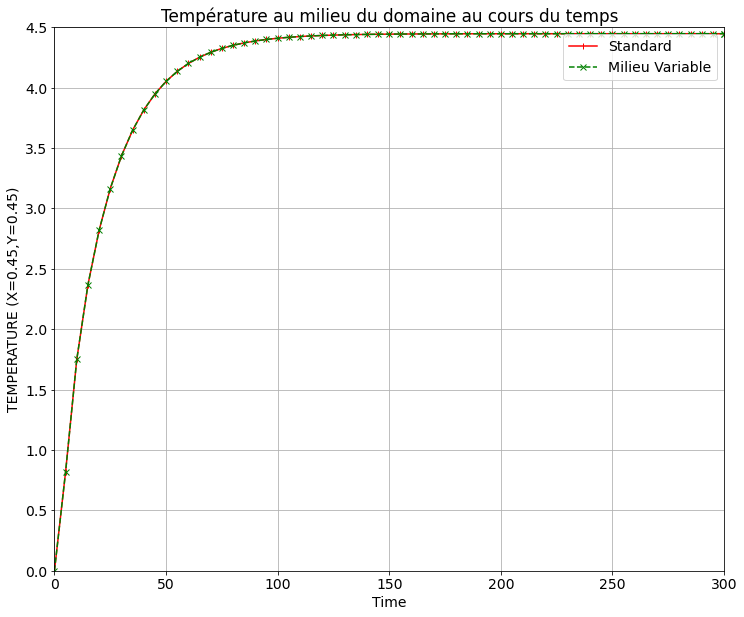

In [3]:
from trustutils import plot

a=plot.Graph("Température au milieu du domaine au cours du temps")
a.addPoint("./conduc_SONDE_POINT.son",marker="-|",color="r",label="Standard")  
a.addPoint("./conduc_var_SONDE_POINT.son",marker="--x",color="g",label="Milieu Variable")  
a.visu(0,300,0,4.5)

### Coupes horizontale et verticale

Deux coupes horizontale et verticale en milieu de domaine, a t=10s dans le calcul.  Le coupe horizontale est obtenue via le segment [0.05,0.45]$\times$[0.95,0.45] alors que la coupe verticale est obtenue via le segment [0.45,0.05]$\times$[0.45,0.95] .

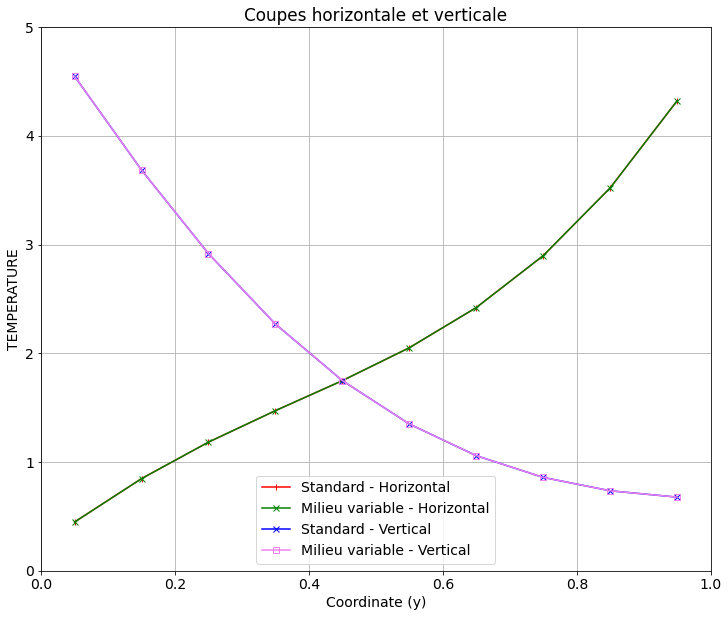

In [4]:
a=plot.Graph("Coupes horizontale et verticale") 
    
a.addSegment("./conduc_SONDE_HORIZ.son",value=10 ,marker="-|",color="r",label="Standard - Horizontal")  
a.addSegment("./conduc_var_SONDE_HORIZ.son",value=10 ,marker="-x",color="g",label="Milieu variable - Horizontal")  
a.addSegment("./conduc_SONDE_VERT.son",value=10 ,marker="-x",color="blue",label="Standard - Vertical")  
a.addSegment("./conduc_var_SONDE_VERT.son",value=10,marker="-s",mfc='none',color="violet",label="Milieu variable - Vertical")  
 
a.visu(0,1,0,5)

## Variation en temps

Le domaine est maintenant une barre horizontale 1D s’etendant de x=0 a 1.  On verifie le comportement de l’equation pour une variation temporelle de $\lambda$.

Condition limite:  temperature imposee a gauche, flux impose a droite.

A t=150s on multiplie la conductivite par 4 de 0.01 a 0.04. Cela fait chuter la temperature interne.

### Coupes horizontales

Coupes horizontales effectuees a t=149s et t=250s, quand les deux regimes stationnaires sont atteints.

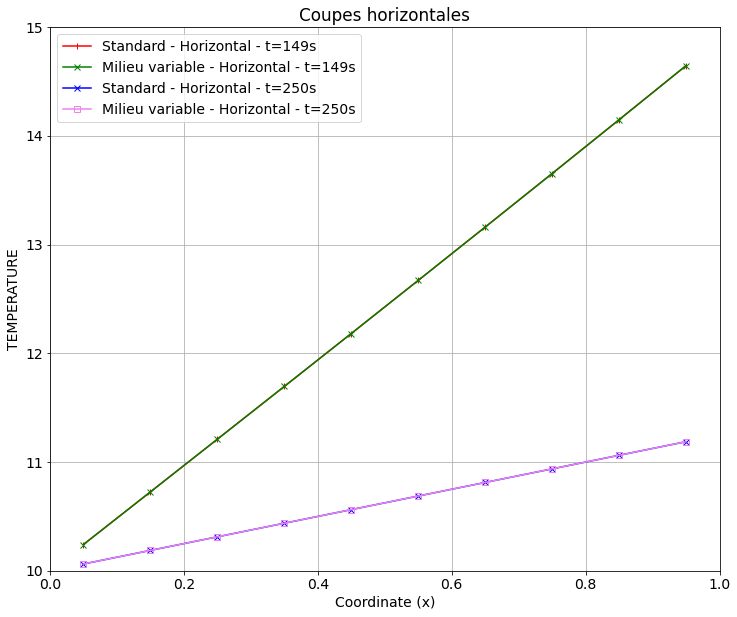

In [5]:
import numpy as np

a=plot.Graph("Coupes horizontales")    
a.addSegment("./conduc_bar_SONDE_HORIZ.son",value=149,color="r"     ,marker="-|",label="Standard - Horizontal - t=149s") 
a.addSegment("./conduc_bar_var_SONDE_HORIZ.son",value=149,color="g"     ,marker="-x",label="Milieu variable - Horizontal - t=149s") 
a.addSegment("./conduc_bar_SONDE_HORIZ.son",value=250,color="b"     ,marker="-x",label="Standard - Horizontal - t=250s") 
a.addSegment("./conduc_bar_var_SONDE_HORIZ.son",value=250,color="violet",marker="-s",markerfacecolor='none',label="Milieu variable - Horizontal - t=250s")  
x=np.linspace(-1,1,100) 
a.visu(0,1,10,15)

### Evolution temporelle en un point

Voici l’evolution temporelle de la temperature pour un point sur le bord droit du domaine. Le changement brutal de conductivite se voit sur le decrochage de la temperature interne du au plus grand flux de sortie.

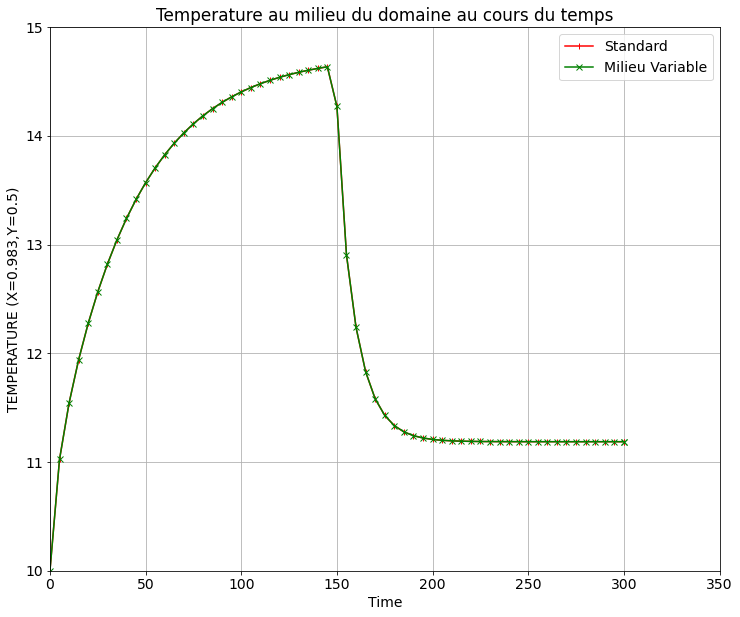

In [6]:
a=plot.Graph("Temperature au milieu du domaine au cours du temps")
a.addPoint("./conduc_bar_SONDE_POINT.son",marker="-|",color="r",label="Standard")  
a.addPoint("./conduc_bar_var_SONDE_POINT.son",marker="-x",color="g",label="Milieu Variable")   
a.visu(0,350,10,15)

## Variation en espace

On prend le cas decrit dans [1].  La geometrie modelise une barre 1D infinie avec une temperature initiale $T_1$ en  $x<0$ et $T_2$ en $x>0$. Les  temperatures  a  gauche  et  a  droite  sont  imposees  a  20  et  10deg respectivement. 

Cela revient a la mise en contact de deux solides a des temperatures differentes.  Le domaine est cette fois charge depuis un fichier MED contenant N elements (N=30).  On utilise les sous-zones definies a partir des groupes d’elements MED, comme suggere par Antoine. 

Instantanement le contact est porte a une temperature constante $T_p$,  et pour $x>0$ (resp. $x<0$) la temperature varie de $T_p$ a $T_2$ (resp. de $T_p$ a $T_1$). 

Pour $x>0$, on a $T−T_p = (T_2−T_p)\text{erf}(x/\sqrt{4a_2t})$ avec $a_2=\lambda_2/(\rho_2 C_{p2})$ 

Pour $x<0$, on a $T−T_p = (T_1−T_p)\text{erf}(x/\sqrt{4a_1t})$ avec $a_1=\lambda_1/(\rho_1 C_{p1})$

Et la temperature de contact $\displaystyle{T_p = \frac{b_1 T_1 +b_2 T_2}{b_1+b_2}}$ avec $b_1=\sqrt{\rho_1 \lambda_1 c_1}$ 

Dans notre cas $T_1$ = 20, $T_2$ = 10, $\rho_1 = \rho_2 = 2$, $C_{p1} = C_{p2} = 0.5$, et finalement $\lambda_1 = 0.01$ et $\lambda_2 = 0.03$ ce qui donne $T_p= 13.66$ 

Sur le graphe ci-dessous,  on  retrouve  cette  temperature  de  joint  a  t=2s,  mais  plus  a  t  final,  car  a ce moment,  l’approximation du milieu infini n’est plus valable et l’on retrouve une rampe lineaire par morceaux a gauche et a droite. On effectue differentes validations en faisant soit varier $\lambda$ par morceaux, soit $\rho$ et $C_p$, et on montre ainsi quand l’utilisation de la nouvelle equation est necessaire.

### Lambda variable

Profil de temperature en transitoire pour unλvariable en espace.  Ce cas est traitable par l’equationstandard de conduction de TRUST. Comparaison a la solution analytique a t=2s.  La moitie gauche (x<0) a une temperature initiale de 20deg, a droite 10deg.

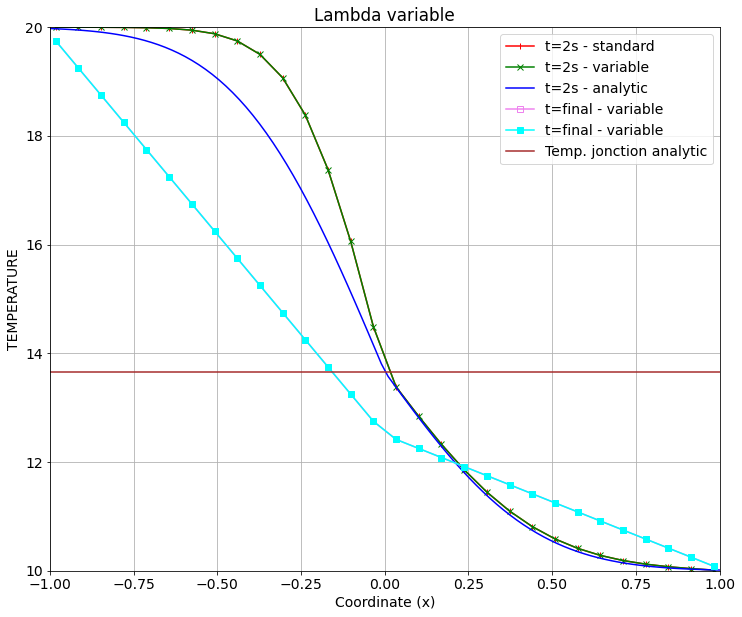

In [7]:
from scipy import special

a=plot.Graph("Lambda variable") 
 

a.addSegment("./conduc_doublebar_SONDE_HORIZ.son"    ,value=2.1 ,color="r",marker="-|",label="t=2s - standard") 
a.addSegment("./conduc_doublebar_var_SONDE_HORIZ.son",value=2.1 ,color="g",marker="-x",label="t=2s - variable")   
# Analytique avec erf

x=np.linspace(-1,1,100)
y=(13.66-20)*special.erf(x/np.sqrt(4*2*0.03))+13.66
y[x>0]=((10-13.66)*special.erf(x/np.sqrt(4*2*0.03))+13.66)[x>0] 
a.add(x,y,color="b",label="t=2s - analytic")

a.addSegment("./conduc_doublebar_SONDE_HORIZ.son",value=3.00099153e+02 ,color="violet",marker="-s",mfc='none',label="t=final - variable")   
a.addSegment("./conduc_doublebar_var_SONDE_HORIZ.son",value=3.00099153e+02  ,color="cyan",marker="-s",label="t=final - variable")   

x=np.linspace(-1,1,100)
y=13.66+0*x
a.add(x,y,color="brown",label="Temp. jonction analytic")    

a.visu(-1,1,10,20)

## $\rho,C_p$ variables en espace

Profil de temperature en transitoire,  cette fois pour $\lambda$, $\rho$ et $C_p$ variables en espace.  Ce cas n’est PAS traitable par l’equation standard de conduction de TRUST. Sur la moitie gauche $\rho = 2$ et $C_p = 0.5$ tandis qu’a droite $\rho = 0.5$ et $C_p = 2.0$.  On garde donc le produit des deux constant, ce qui nous ramene a la meme solution analytique que precedemment.  La comparaison est faite a t=2s.

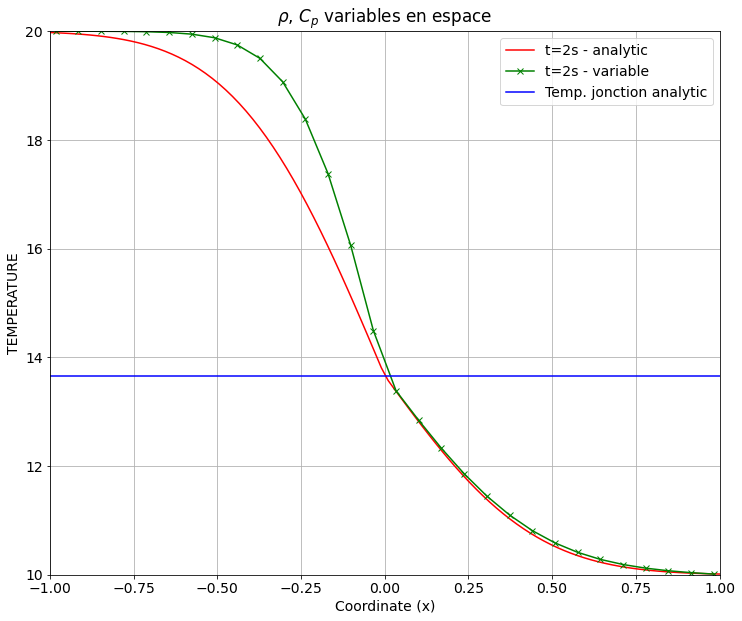

In [8]:
a=plot.Graph(r"$\rho$, $C_p$ variables en espace") 
# Analitique avec erf

x=np.linspace(-1,1,100)
y=(13.66-20)*special.erf(x/np.sqrt(4*2*0.03))+13.66
y[x>0]=((10-13.66)*special.erf(x/np.sqrt(4*2*0.03))+13.66)[x>0]
y

a.add(x,y,color="red",label="t=2s - analytic")  
a.addSegment("./conduc_doublebar_rhoCp_var_SONDE_HORIZ.son",value=2.1 ,marker="-x",color="g",label="t=2s - variable")  
x=np.linspace(-1,1,100)
y=13.66+0*x
a.add(x,y,color="b",label="Temp. jonction analytic") 
a.visu(-1,1,10,20)

## Validation en EF

La double barre infinie en discretisation ’EF’ maintenant, pour avoir une situation similaire a ce que traite FLICA4 actuellement avec les maillages filaires 1D (meme si a terme on s’oriente vers une modelisation 3D de la thermique sur discretisation VDF). Pour rappel en EF, la temperature est localisee aux sommets, mais les proprietes physiques $\lambda$, $\rho$ et $C_p$ restent aux elements. 

Comme  precedemment  le  maillage  est  construit  de  telle  maniere  que  l’abscisse  $x$=0  coincide  avec  un noeud (la disconituite des proprietes physiques se produit donc exactement en $x$=0). 

On charge les proprietes physiques comme precedemment en utilisant les groupes d’elements definis dansle fichier MED, mais par contre la temperature initiale (definie aux sommets donc, et non aux elements comme en VDF) est chargee a partir d’un champ MED aux noeuds.  La temperature au sommet $x$=0 est definie a 15deg (les memes resultats sont obtenues en prenant comme temperature initiale $T_p$). 

Le meme calcul que precedemment est conduit, a savoir le produit $\rho C_p$ constant et $\lambda$ variable.

### EF sur la double barre

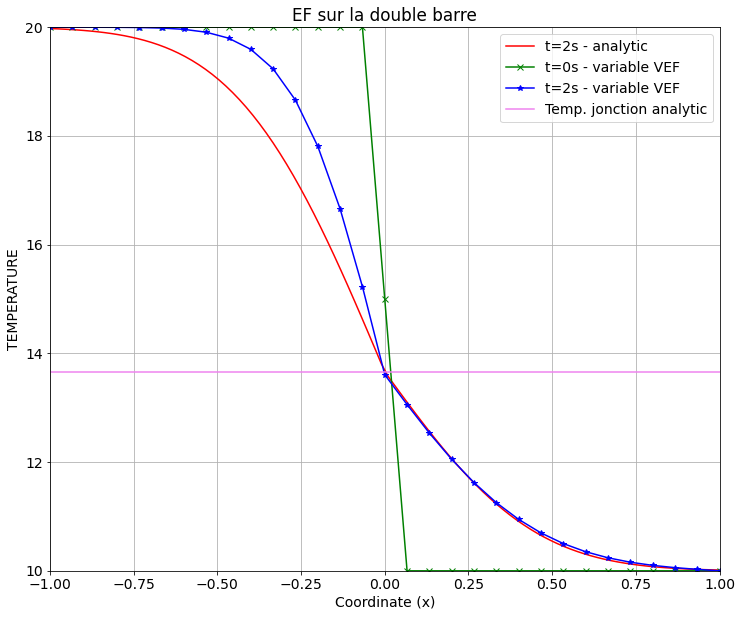

In [9]:
a=plot.Graph("EF sur la double barre")  
# Analytique avec erf
x=np.linspace(-1,1,100)
y=(13.66-20)*special.erf(x/np.sqrt(4*2*0.03))+13.66
y[x>0]=((10-13.66)*special.erf(x/np.sqrt(4*2*0.03))+13.66)[x>0]
a.add(x,y,color="r",label="t=2s - analytic")  
a.addSegment("./conduc_doublebar_rhoCp_var_vef_SONDE_HORIZ.son",value=0 ,marker="-x",color="g",label="t=0s - variable VEF")  
a.addSegment("./conduc_doublebar_rhoCp_var_vef_SONDE_HORIZ.son",value=2 ,marker="-*",color="b",label="t=2s - variable VEF")  
x=np.linspace(-1,1,100)
y=13.66+0*x
a.add(x,y,color="violet",label="Temp. jonction analytic") 
a.visu(-1,1,10,20)

### Validation en VEF

Et  pour  finir,  la  double  barre  infinie  en  discretisation  ’VEF’  Pour  rappel  en  VEF,  la  temperature  est localisee aux faces, mais les proprietes physiques $\lambda$, $\rho$ et $C_p$ restent aux elements. 

Comme precedemment le maillage est construit de telle maniere que l’abscisse $x$=0 coincide avec un noeud(la disconituite des proprietes physiques se produit donc exactement en $x$=0). Pour ce cas, le maillage VDF a ete utilise et a ete triangularise avec la commande trianguler_h.

On charge les proprietes physiques comme precedemment en utilisant les groupes d’elements definis dansle  fichier  MED,  mais  par  contre  la  temperature  initiale  (definie  aux  faces  donc,  et  non  aux  elements comme en VDF) est chargee a partir d’un champ MED aux noeuds.  La temperature a la face $x$=0 estdefinie a 15deg (les memes resultats sont obtenues en prenant comme temperature initiale $T_p$).

Le meme calcul que precedemment est conduit, a savoir le produit $\rho C_p$ constant et $\lambda$ variable.

### VEF sur la double barre

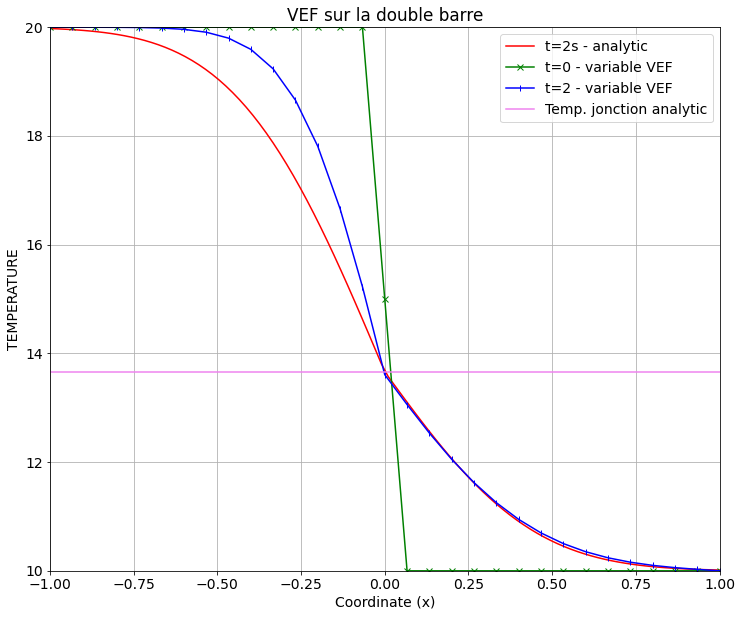

In [10]:
import math as m

a=plot.Graph("VEF sur la double barre") 
# Analytique avec erf
x=np.linspace(-1,1,100)
y=(13.66-20)*special.erf(x/np.sqrt(4*2*0.03))+13.66
y[x>0]=((10-13.66)*special.erf(x/np.sqrt(4*2*0.03))+13.66)[x>0]
a.add(x,y,color="r",label="t=2s - analytic")  
#a.addSegment("./build/conduc_doublebar_vef_SONDE_HORIZ.son",value=0 ,marker="-|")   
a.addSegment("./conduc_doublebar_rhoCp_var_vef_SONDE_HORIZ.son",value=0 ,marker="-x",color="g",label="t=0 - variable VEF") 
a.addSegment("./conduc_doublebar_rhoCp_var_vef_SONDE_HORIZ.son",value=2 ,marker="-|",color="b",label="t=2 - variable VEF")  
x=np.linspace(-1,1,100)
y=13.66+0*x
a.add(x,y,color="violet",label="Temp. jonction analytic") 
a.visu(-1,1,10,20)

### Cas avec source

On considere maintenant un cas completement analytique variable en espace et en temps.  Le domaine est une barre 1D s’etendant de 0 a 1 en $x$.  Les conditions limites sont en temperature imposee avec $T$($x$=0) = $T$($x$=1) = 0.  La condition initiale est aussi nulle uniformement.  On garde la discretisation EF utilisee precedemment.

Soit la solution 

$$T= \sin(\pi x) \sin t$$

et les parametres physiques (strictement positifs) definis par

$$ \lambda = \sin x \sin t+ 1.5$$
$$\rho C_p= \sin x \sin t + 2$$

Cette configuration conduit a

$$−\nabla \cdot(\lambda \nabla T) = \pi \sin t(\pi(\sin x \sin t+ 1.5) \sin(\pi x)− \cos x \cos(\pi x) \sin t)$$

et a

$$ \rho C_p \frac{\partial T}{\partial t} = (\sin x \sin t+ 2)(\sin(\pi x) \cos t)$$

Le terme source à employer est donc la somme des deux:

$$ S = - \nabla \cdot (\lambda \nabla T) + \rho C_p \frac{\partial T}{\partial t}$$

### EF avec source sur simple barre

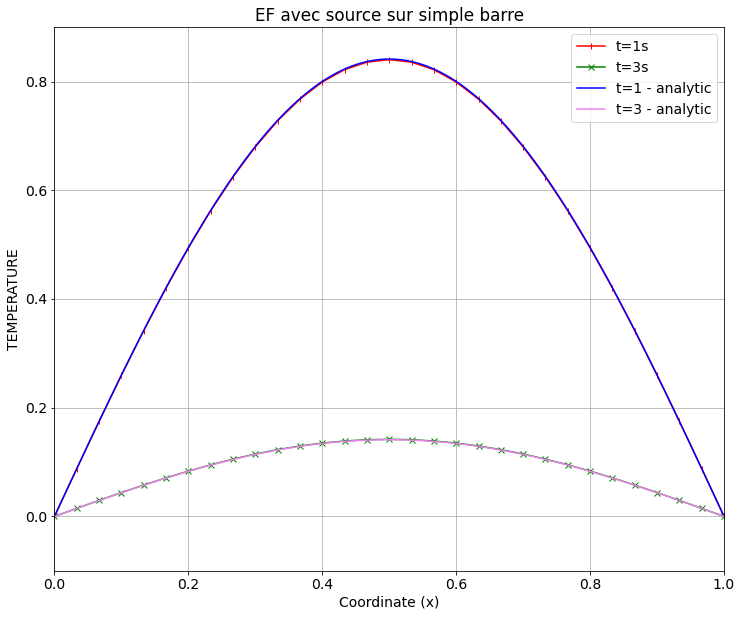

In [11]:
a=plot.Graph("EF avec source sur simple barre")
a.addSegment("./conduc_bar_ef_ana_SONDE_HORIZ.son",value=1 ,marker="-|",label="t=1s",color="r")  
a.addSegment("./conduc_bar_ef_ana_SONDE_HORIZ.son",value=3 ,marker="-x",label="t=3s",color="g") 
x=np.linspace(0,1,100)
y=np.sin(3.1415926535898*x)*np.sin(1.0)
a.add(x,y,color="blue",label="t=1 - analytic")
y=np.sin(3.1415926535898*x)*np.sin(3.0)
a.add(x,y,color="violet",label="t=3 - analytic")
a.visu(0,1,-0.1,0.9)

## Jeu de donnees illustrant l’utilisation des sous-zones en VDF
Apres chargement du fichier MED on relit le fichier de sous-zones qui permet d’acceder a ’left_elem’ et 'right_elem’ les deux groupes d’elements definis dans MED

In [12]:
run.dumpDataset("./conduc_doublebar.data") 

 # Conduction 1D : une barre horizontale faite de deux materiaux  #
 # PARALLEL NOT #
 dimension 2
 
 Pb_conduction pb
 Domaine dom
 
 # BEGIN MESH #
 Lire_med family_names_from_group_names dom med_domain domain.med
 Read_file dom_ssz.geo ;
 # END MESH #
 
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VDF dis
 
 Scheme_euler_implicit sch
 Read sch
 {
 	 tinit 0
 	 tmax 300.
 	 dt_min 0.00001
 	 dt_max 0.1
 	 dt_impr 0.00001
 	 dt_sauv 100
 	 seuil_statio 1.e-8
 
 	 facsec_max 100
 	 facsec 1
 	 nb_pas_dt_max 9000000000 
 	 solveur implicite { solveur gmres { diag seuil 1e-15 nb_it_max 5 impr } } 
 
 }
 
 Solide sol
 Read sol
 {
   rho Champ_Uniforme 1 2
   # rho Champ_Uniforme_morceaux dom 1 { defaut	 1.0e10 left_elem 2.0 right_elem 0.5 } #
   
 	 lambda Champ_Uniforme_morceaux dom 1 
 	   {
        defaut	 1.0e10  # pas plus de 1.0e38

4# References
[1] Lagree  -  Cours  sur  la  resolution  de  l  equation  de  la  chaleur  -  http://www.lmm.jussieu.fr/  lagree/-COURS/MECAVENIR/cours6eqchalresol.pdf